# LSTM

In [3]:
pip install pandas_datareader


     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
     ---------- -------------------------- 30.7/109.5 kB 435.7 kB/s eta 0:00:01
     ---------- -------------------------- 30.7/109.5 kB 435.7 kB/s eta 0:00:01
     ------------- ----------------------- 41.0/109.5 kB 196.9 kB/s eta 0:00:01
     ------------------------------- ----- 92.2/109.5 kB 375.8 kB/s eta 0:00:01
     ------------------------------- ----- 92.2/109.5 kB 375.8 kB/s eta 0:00:01
     ------------------------------------ 109.5/109.5 kB 318.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("M:\\Deep Learning\\MSFT.csv")

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


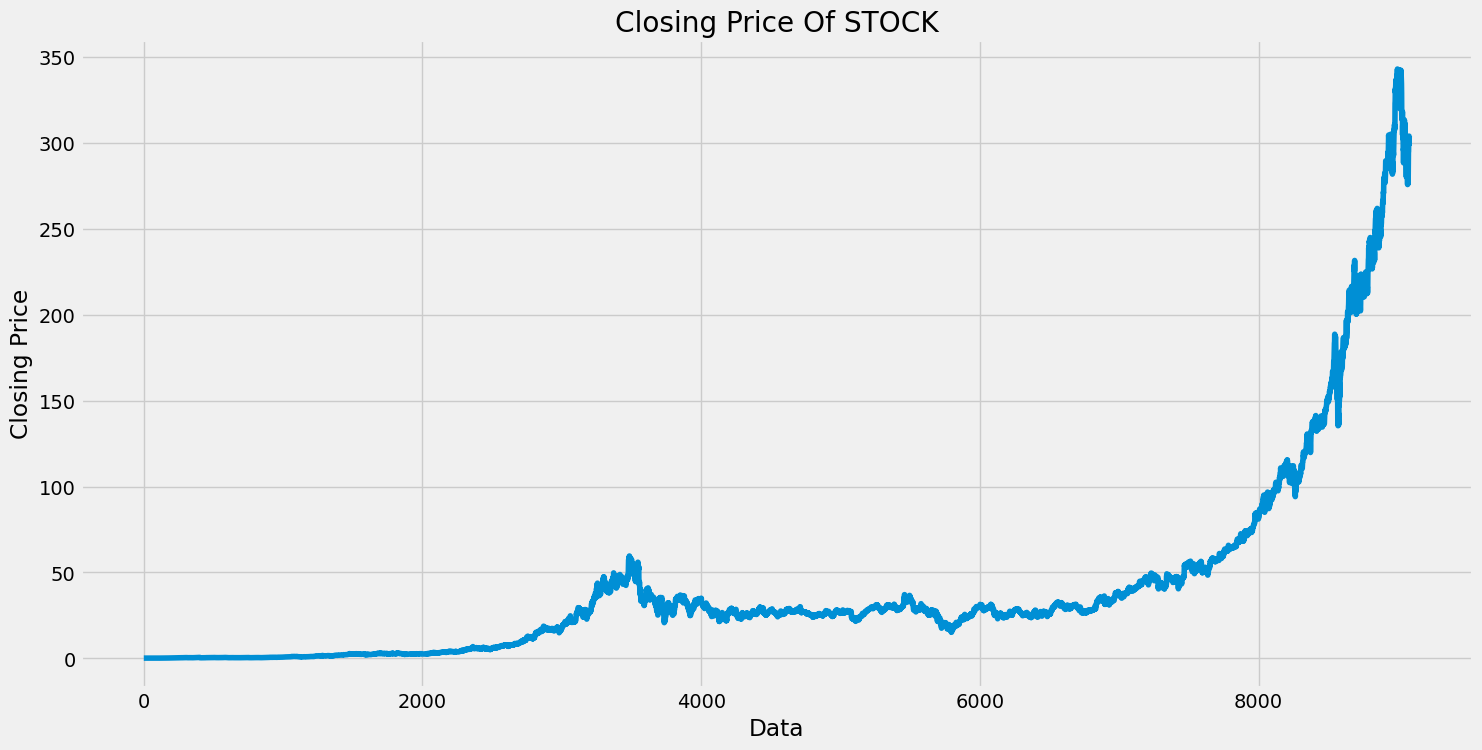

In [9]:
plt.figure(figsize=(16,8))
plt.title('Closing Price Of STOCK')
plt.plot(df['Close'])
plt.xlabel('Data')
plt.ylabel('Closing Price')
plt.show()

In [10]:
#create new database with only required coloumns
data=df.filter(['Close'])
#convert the dataframe to numpy array
dataset=data.values
#get the number of rows to train 80 percent
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

7267

In [11]:
#scale the data
scaler=StandardScaler() 
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  1.0013153162753806e-16
Standard deviation of processed data:  1.0


In [12]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])

In [13]:
#convert x_train and y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(7207, 60, 1)

In [14]:
#reshape the data
print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (7207, 60, 1)
x_train shape after reshaping (7207, 60, 1)


In [15]:
#build LSTM model
model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1)) 

In [16]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 507,601
Trainable params: 507,601
Non-trainable params: 0
_________________________________________________________________


In [18]:
#train the model
history = model.fit(x_train,y_train,epochs=5)

Epoch 1/5
226/226 [==============================] - 26s 94ms/step - loss: 0.0025
Epoch 2/5
226/226 [==============================] - 23s 102ms/step - loss: 2.4382e-04
Epoch 3/5
226/226 [==============================] - 24s 107ms/step - loss: 2.1849e-04
Epoch 4/5
226/226 [==============================] - 21s 91ms/step - loss: 2.0705e-04
Epoch 5/5
226/226 [==============================] - 22s 99ms/step - loss: 1.8994e-04


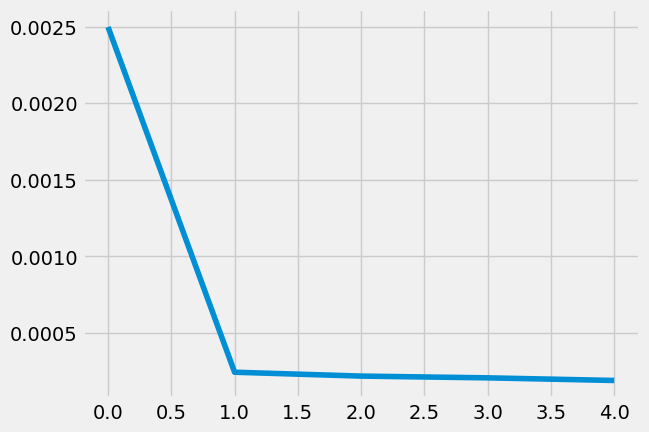

In [19]:
plt.plot(history.history['loss'])

In [20]:
#create the testing dataset
#createt new array
test_data=scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [21]:
#convert the data to numpy 
x_test=np.array(x_test)

In [22]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

57/57 [==============================] - 2s 26ms/step
[[ 46.695   ]
 [ 46.725292]
 [ 46.876835]
 ...
 [256.40237 ]
 [260.07687 ]
 [262.5302  ]]
